<a href="https://www.kaggle.com/code/fikriabdillah98/obesity-prediction-2?scriptVersionId=259695371" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s4e2/sample_submission.csv
/kaggle/input/playground-series-s4e2/train.csv
/kaggle/input/playground-series-s4e2/test.csv


# Goal
The goal of this competition is to use various factors to predict obesity risk in individuals, which is related to cardiovascular disease.

In [2]:
# Import Train Dataset
df_train = pd.read_csv('/kaggle/input/playground-series-s4e2/train.csv', index_col = 'id')

# Import Test Dataset
df_test = pd.read_csv('/kaggle/input/playground-series-s4e2/test.csv', index_col = 'id')

# Display Dataset
print('Train Dataset')
display(df_train.tail(5))

print("Test Dateset")
display(df_test.head(5))

Train Dataset


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
id,,,,,,,,,,,,,,,,,
20753,Male,25.137087,1.766626,114.187096,yes,yes,2.919584,3.000000,Sometimes,no,2.151809,no,1.330519,0.196680,Sometimes,Public_Transportation,Obesity_Type_II
20754,Male,18.000000,1.710000,50.000000,no,yes,3.000000,4.000000,Frequently,no,1.000000,no,2.000000,1.000000,Sometimes,Public_Transportation,Insufficient_Weight
20755,Male,20.101026,1.819557,105.580491,yes,yes,2.407817,3.000000,Sometimes,no,2.000000,no,1.158040,1.198439,no,Public_Transportation,Obesity_Type_II
20756,Male,33.852953,1.700000,83.520113,yes,yes,2.671238,1.971472,Sometimes,no,2.144838,no,0.000000,0.973834,no,Automobile,Overweight_Level_II
20757,Male,26.680376,1.816547,118.134898,yes,yes,3.000000,3.000000,Sometimes,no,2.003563,no,0.684487,0.713823,Sometimes,Public_Transportation,Obesity_Type_II


Test Dateset


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
id,,,,,,,,,,,,,,,,
20758,Male,26.899886,1.848294,120.644178,yes,yes,2.938616,3.000000,Sometimes,no,2.825629,no,0.855400,0.000000,Sometimes,Public_Transportation
20759,Female,21.000000,1.600000,66.000000,yes,yes,2.000000,1.000000,Sometimes,no,3.000000,no,1.000000,0.000000,Sometimes,Public_Transportation
20760,Female,26.000000,1.643355,111.600553,yes,yes,3.000000,3.000000,Sometimes,no,2.621877,no,0.000000,0.250502,Sometimes,Public_Transportation
20761,Male,20.979254,1.553127,103.669116,yes,yes,2.000000,2.977909,Sometimes,no,2.786417,no,0.094851,0.000000,Sometimes,Public_Transportation
20762,Female,26.000000,1.627396,104.835346,yes,yes,3.000000,3.000000,Sometimes,no,2.653531,no,0.000000,0.741069,Sometimes,Public_Transportation


In [3]:
# concat all dataset
df_all = pd.concat((df_train.loc[:,'Gender':'MTRANS'],
                  df_test.loc[:,'Gender':'MTRANS']))

df_all.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
id,,,,,,,,,,,,,,,,
0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation
1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile
2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation
3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation
4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation


| Abbreviation   | Meaning                                 |
|:---------------|:------------------------------------------|
| FAVC           | Frequent consumption of high caloric food |
| FCVC           | Frequency of consumption of vegetables    |
| NCP            | Number of main meals                      |
| CAEC           | Consumption of food between meals         |
| CH20           | Consumption of water daily                |
| CALC           | Consumption of alcohol                    |
| SCC            | Calories consumption monitoring           |
| FAF            | Physical activity frequency               |
| TUE            | Time using technology devices             |
| MTRANS         | Transportation used                       |

# Exploratory Data Analysis

## Statistical Information of the Dataset

In [4]:
# Statistical Information Train Dataset
display(df_all.info())
print('--------------------')
print('Shape of the Dataset')
display(df_all.shape)
print('--------------------')
print('Dataset Description')
display(df_all.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 34598 entries, 0 to 34597
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          34598 non-null  object 
 1   Age                             34598 non-null  float64
 2   Height                          34598 non-null  float64
 3   Weight                          34598 non-null  float64
 4   family_history_with_overweight  34598 non-null  object 
 5   FAVC                            34598 non-null  object 
 6   FCVC                            34598 non-null  float64
 7   NCP                             34598 non-null  float64
 8   CAEC                            34598 non-null  object 
 9   SMOKE                           34598 non-null  object 
 10  CH2O                            34598 non-null  float64
 11  SCC                             34598 non-null  object 
 12  FAF                             34598

None

--------------------
Shape of the Dataset


(34598, 16)

--------------------
Dataset Description


,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,34598.000000,34598.000000,34598.000000,34598.000000,34598.000000,34598.000000,34598.000000,34598.000000
mean,23.886181,1.699721,87.686451,2.444704,2.757043,2.030469,0.978861,0.614467
std,5.733207,0.087895,26.273493,0.532568,0.707610,0.609566,0.839122,0.604475
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,20.000000,1.631856,66.000000,2.000000,3.000000,1.784710,0.006892,0.000000
50%,22.851747,1.700000,84.000000,2.392179,3.000000,2.000000,1.000000,0.555591
75%,26.000000,1.761773,111.539494,3.000000,3.000000,2.550570,1.583832,1.000000
max,61.000000,1.980000,165.057269,3.000000,4.000000,3.000000,3.000000,2.000000


## Check Null Data

In [5]:
# Check Null data
print('Total Null Dataset: ')
display(df_all.isnull().sum())

print(' ')

# Check Duplicated Data
print('Total Duplicated Dataset: ')
df_all.duplicated().sum()

Total Null Dataset: 


Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
dtype: int64

 
Total Duplicated Dataset: 


0

## Create Function of Plot

In [6]:
# create plot function
import matplotlib.pylab as plt
import seaborn as sns
sns.set(style = 'whitegrid')
def pie_plot(data, feature, hue = None):
    if data[feature].dtypes == 'Object' or data[feature].dtypes == 'O':
        fig = plt.figure(figsize = (6,6))
        val = data[feature].value_counts().values
        cat = data[feature].value_counts().index
        plt.pie(val, labels = cat, autopct = '%1.1f%%')
        plt.title(f'Distribution Plot of {feature}')
        fig.tight_layout()
        plt.show()
    else:
        fig = plt.figure(figsize = (8,5))
        sns.kdeplot(data, x = feature, hue = hue, fill = True)
        plt.title(f"Distribution Plot of Obesity based on {feature} ")
        fig.tight_layout()
        plt.show()

## Obesity Category

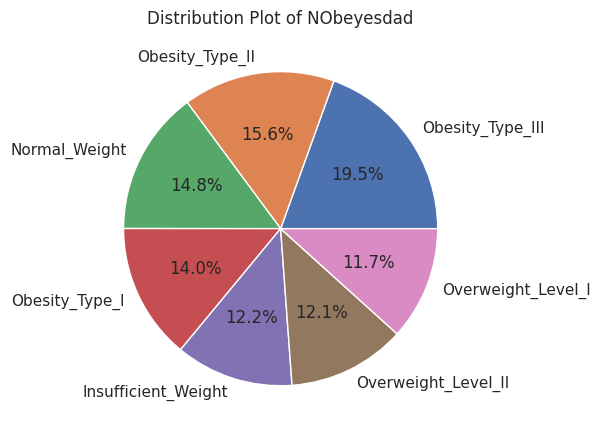

In [7]:
pie_plot(df_train, 'NObeyesdad')

## FAVC (Frequent Consumption of High Calories)

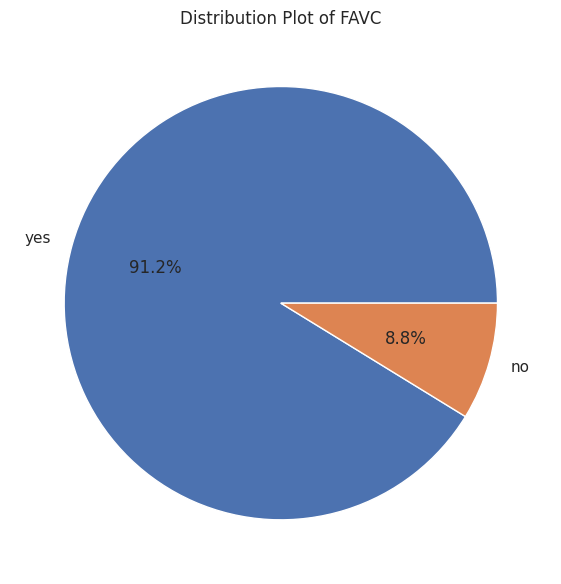

In [8]:
# FAVC Plot
pie_plot(df_all, 'FAVC')

## FCVC (Frequency of consumption of vegetables)

#Train Dataset


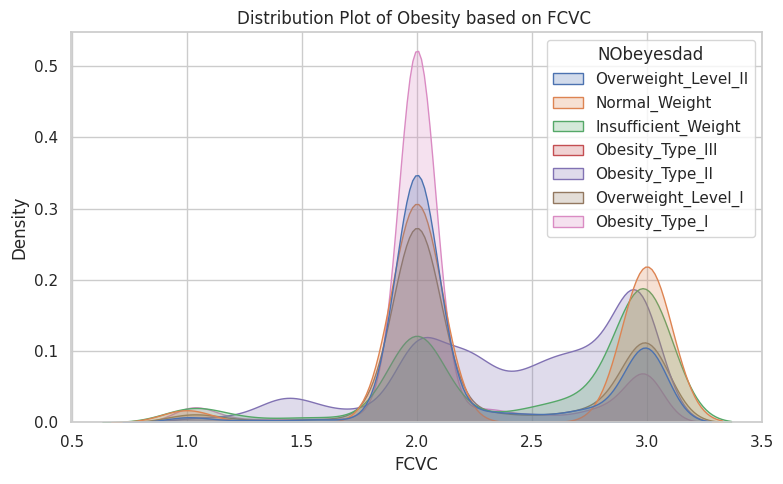

None

 
#All Dataset


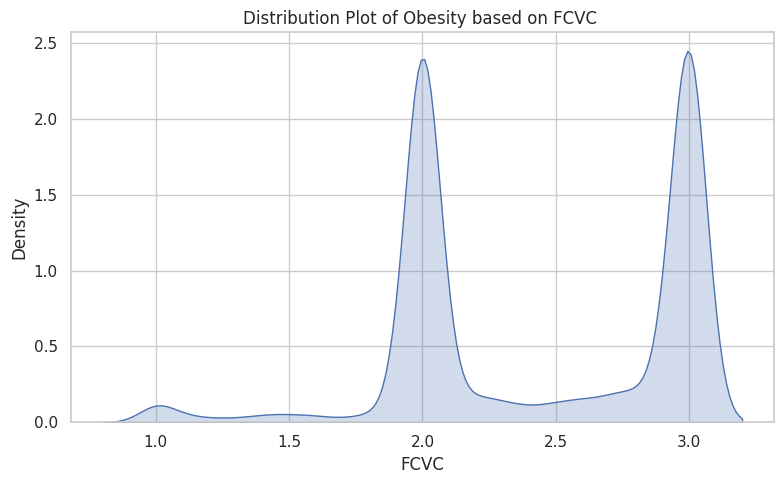

None

In [9]:
# FVCV pie plot
print('#Train Dataset')
display(pie_plot(df_train, 'FCVC', 'NObeyesdad')) #Train Dataset
print(" ")
print('#All Dataset')
display(pie_plot(df_all, 'FCVC')) # All Dataset

## Gender

All Dataset


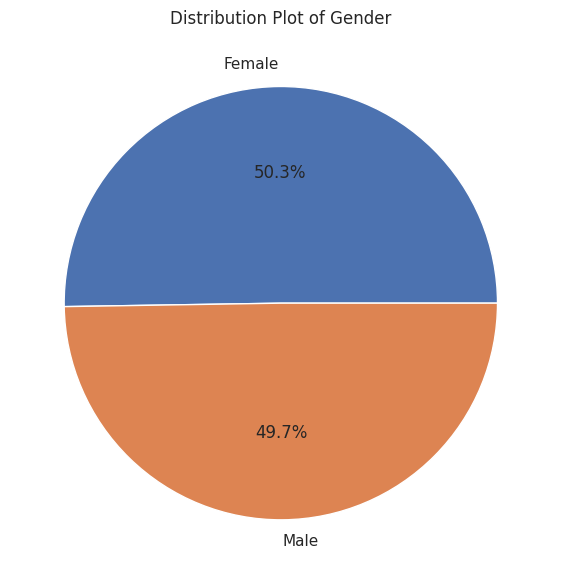

None

 
Train Dataset


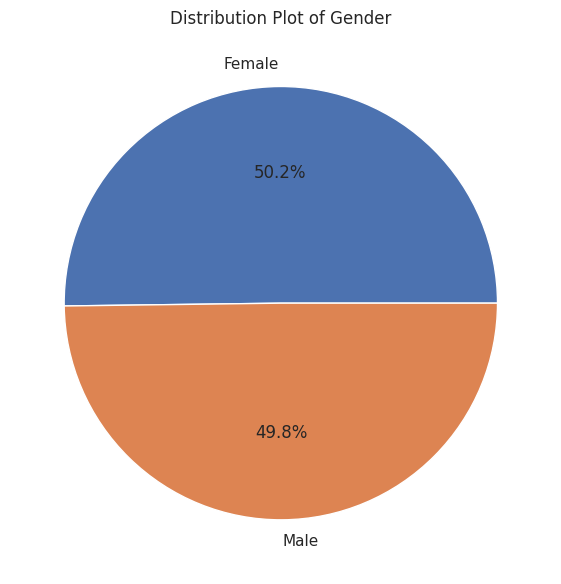

None

In [10]:
# Gender Distribution
print('All Dataset')
display(pie_plot(df_all, 'Gender'))# All Dataset
print(' ')
print('Train Dataset')
display(pie_plot(df_train, 'Gender')) # Train Dataset

## NCP (Number of Main Meals)

Data Train


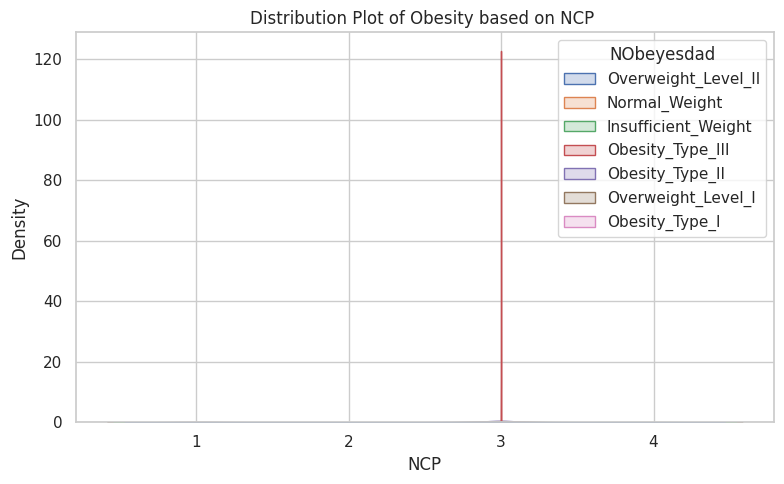

None

 
All Dataset


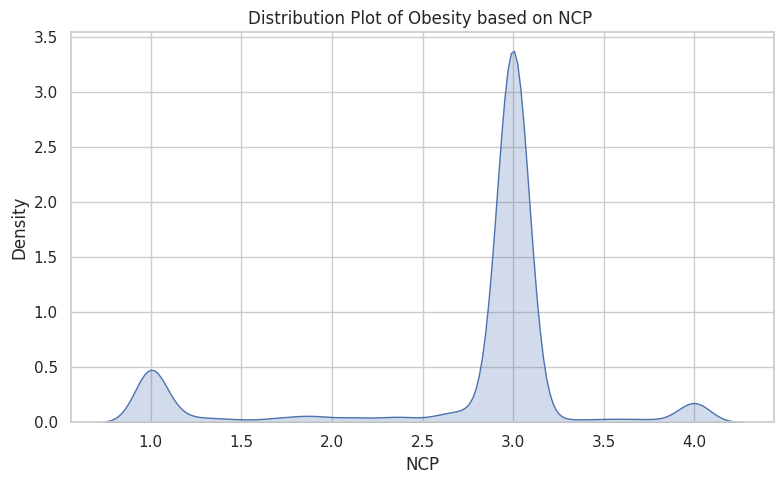

None

In [11]:
# NCP Distribution
print('Data Train')
display(pie_plot(df_train, 'NCP', 'NObeyesdad')) # Train Dataset
print(" ")
print('All Dataset')
display(pie_plot(df_all, 'NCP')) # All Dataset

## CAEC (Consumption of Food between Meals)

Train Data


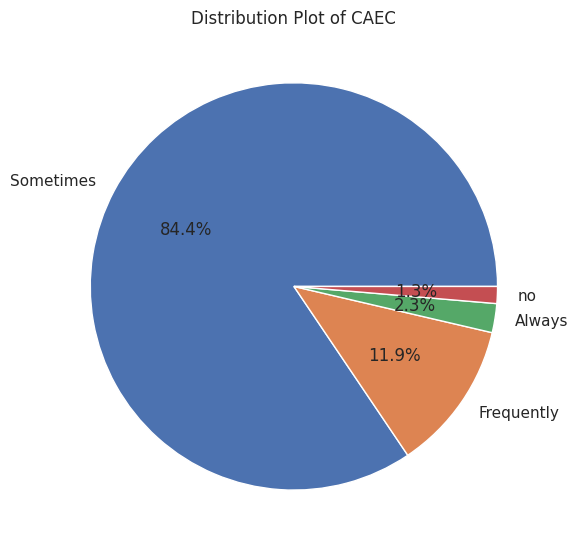

None

 
All Data


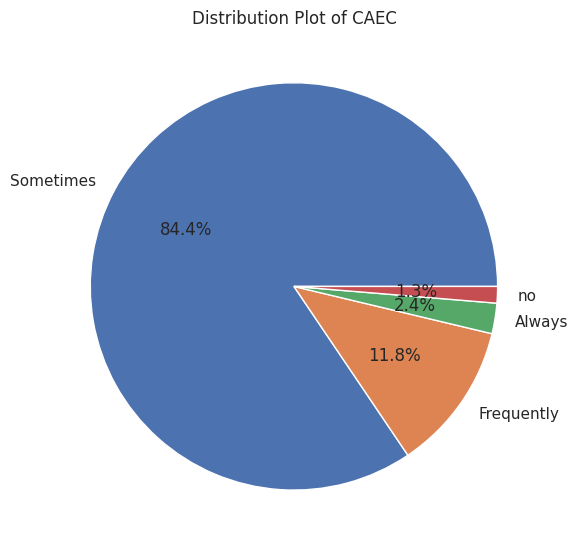

None

In [12]:
# CAEC Distribution
print('Train Data')
display(pie_plot(df_train, 'CAEC'))
print(" ")
print('All Data')
display(pie_plot(df_all, 'CAEC'))

## SMOKE

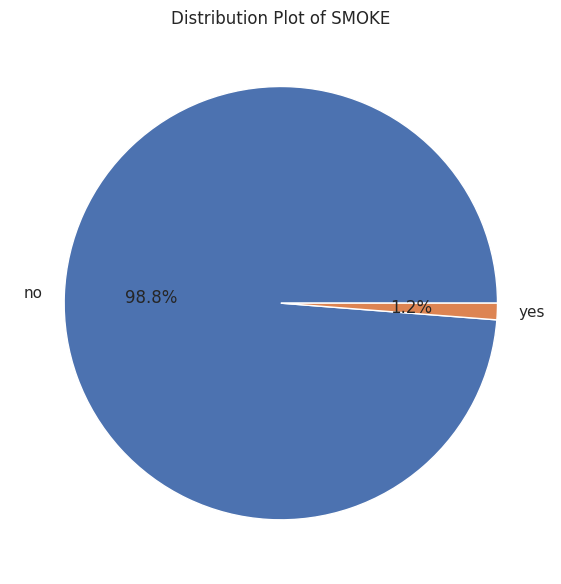

None

In [13]:
# SMOKE Distribution
display(pie_plot(df_all, 'SMOKE'))

## SCC (Calories Consumption Monitoring)

Train Data


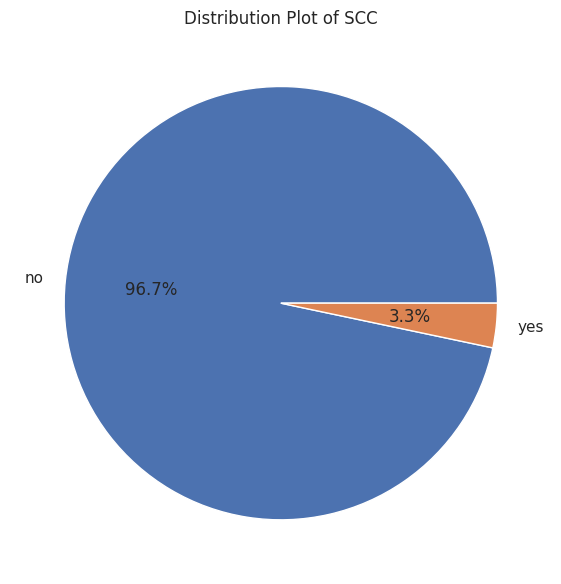

None

In [14]:
# SCC Data
print('Train Data')
display(pie_plot(df_train, 'SCC'))

## CH20 (Daily Water Consumption)

Data Train


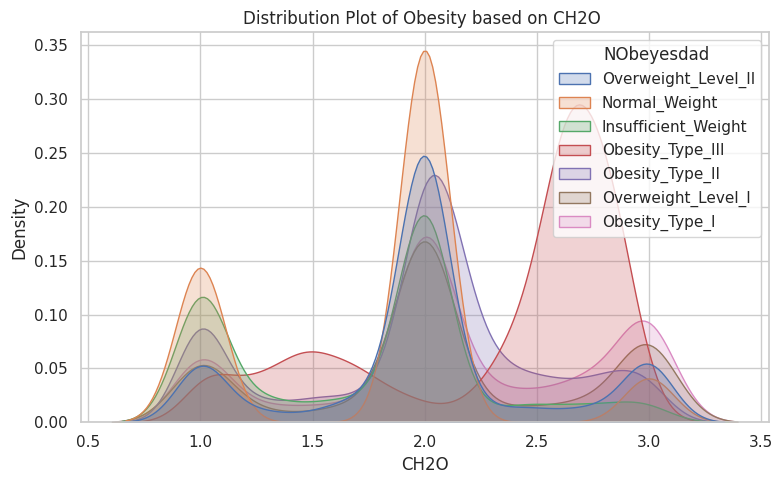

None

 
ALL Data


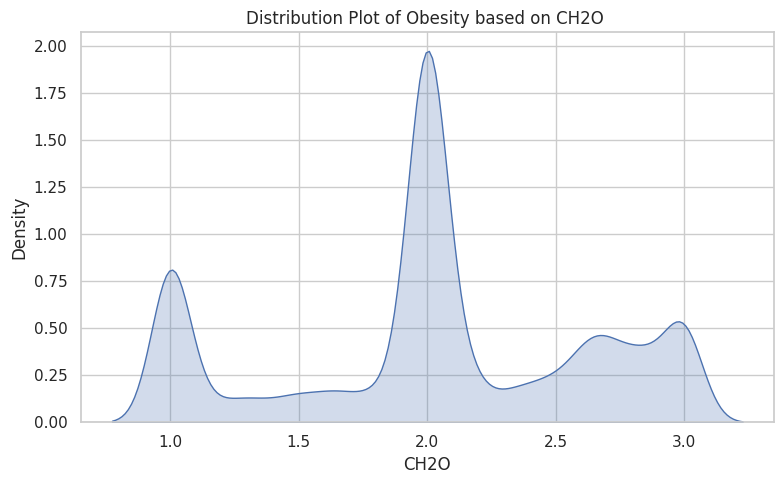

None

In [15]:
print('Data Train')
display(pie_plot(df_train, 'CH2O', 'NObeyesdad'))
print(" ")
print('ALL Data')
display(pie_plot(df_all, 'CH2O'))

## FAF (Frequency of Physical Activity)

Data Train


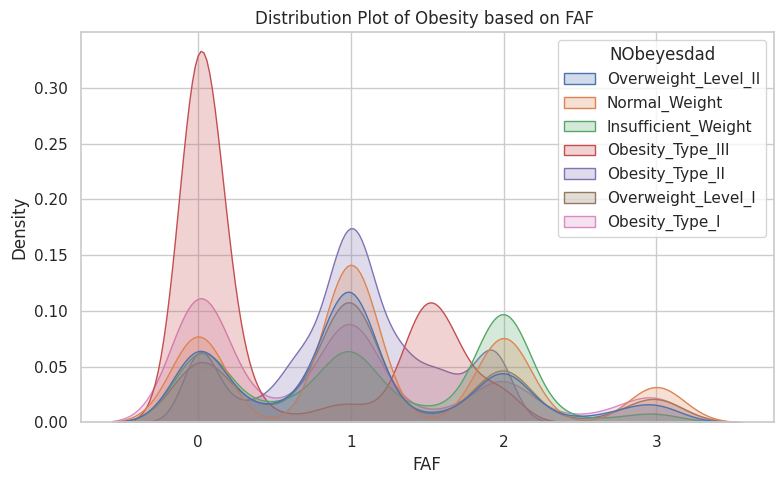

None

 
All Data


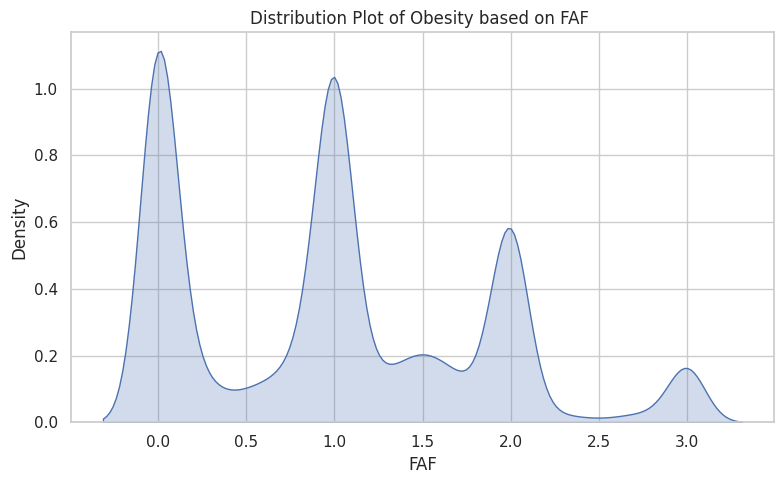

None

In [16]:
print('Data Train')
display(pie_plot(df_train, 'FAF', 'NObeyesdad'))
print(" ")
print('All Data')
display(pie_plot(df_all, 'FAF'))


## TUE(Time Using Technology Devices)

Data Train


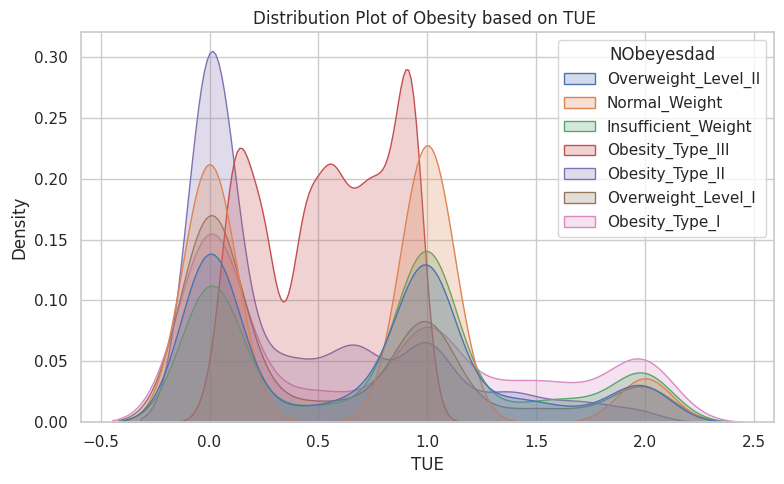

None

 
All Data


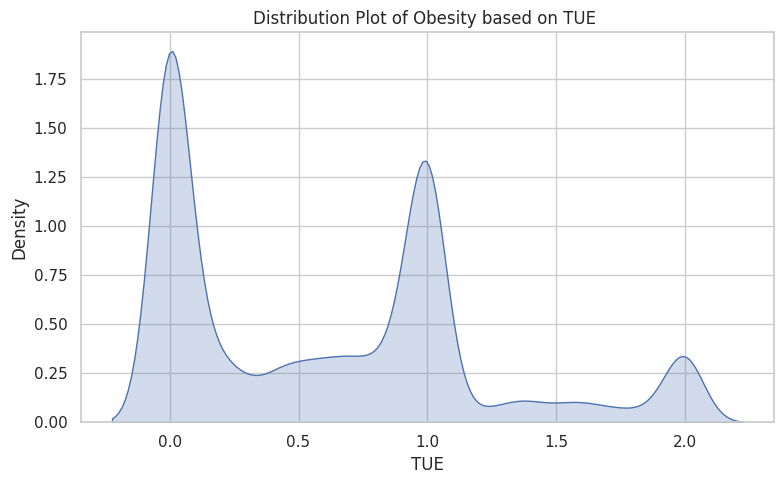

None

In [17]:
print('Data Train')
display(pie_plot(df_train, 'TUE', 'NObeyesdad'))
print(" ")
print("All Data")
display(pie_plot(df_all, 'TUE'))

## SCC (Calories Consumption Monitoring)

Data Train


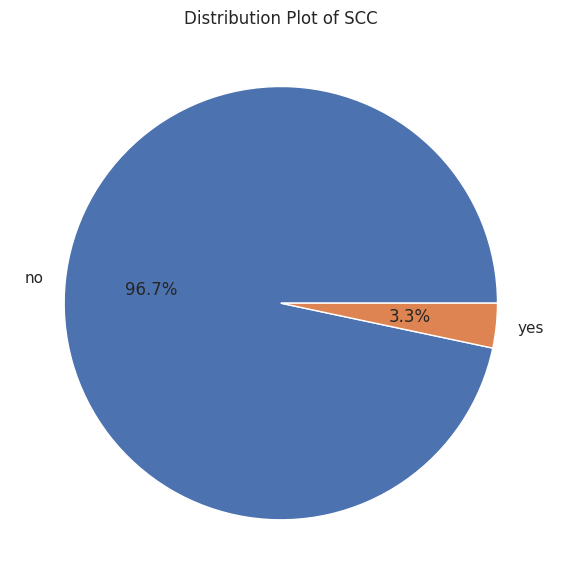

None

In [18]:
print('Data Train')
display(pie_plot(df_all, 'SCC'))

## MTRANS (Tranportation Used)

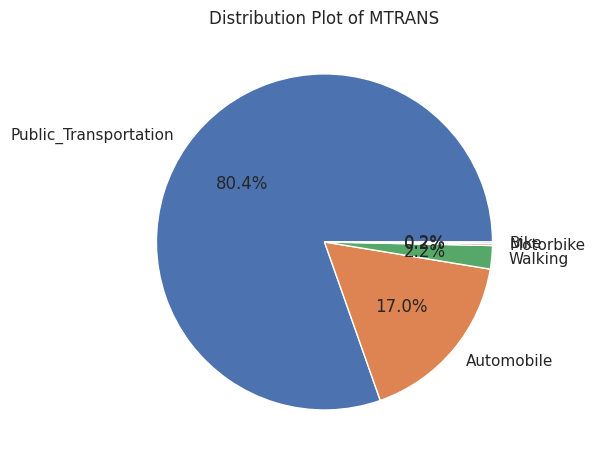

None

In [19]:
display(pie_plot(df_train, 'MTRANS'))

## Weight and Height

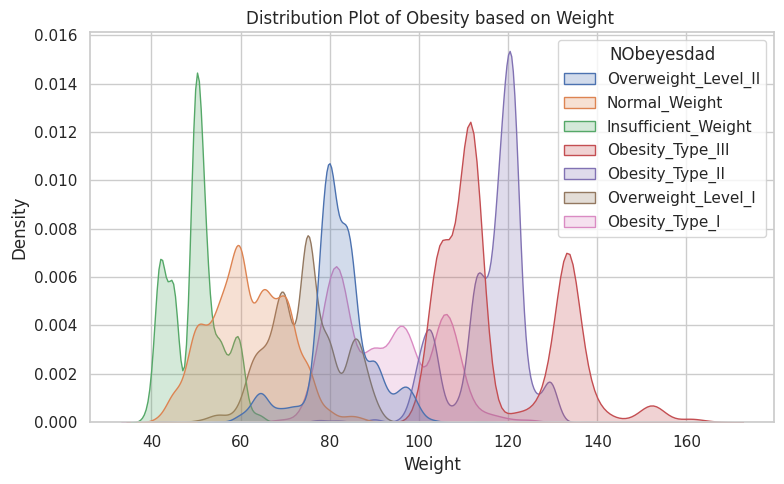

In [20]:
# Weight
pie_plot(df_train, 'Weight', 'NObeyesdad')

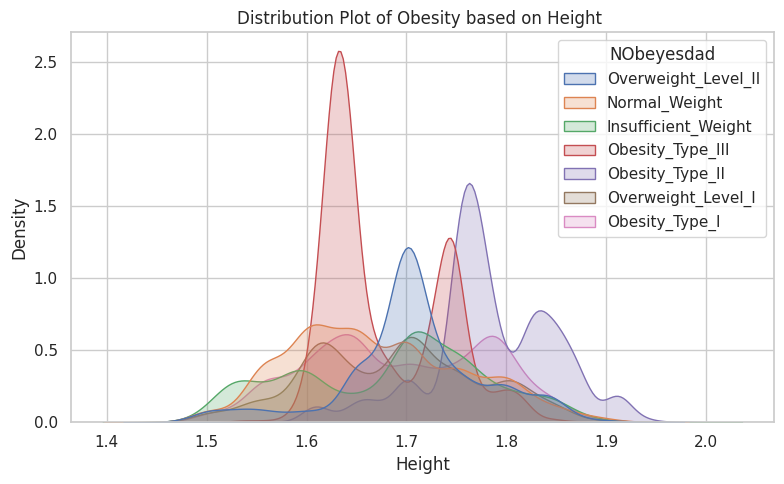

In [21]:
# Height
pie_plot(df_train, 'Height', 'NObeyesdad')

## Family History with Obesity

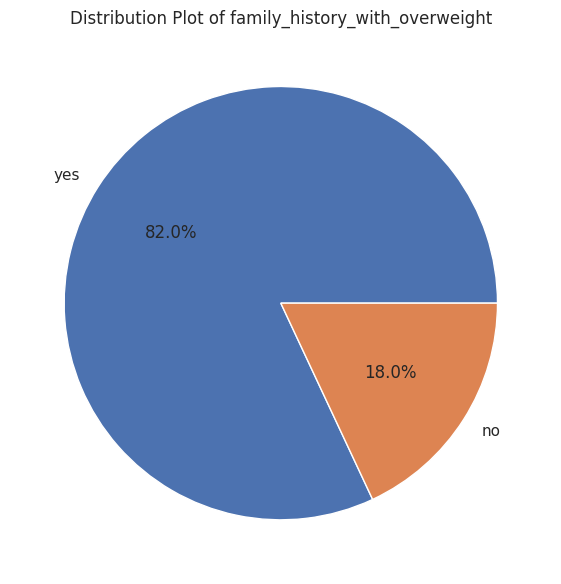

In [22]:
pie_plot(df_train, 'family_history_with_overweight')

## Body Mass Index (Weight/Height^2)

Body Mass Index Category:

1. less or equal than 18.4 (Underweight)
2. 18.5 - 24.9 (Normal)
3. 25.0 - 39.9 (Overweight)
4. more than 40 (Obesity)

In [23]:
# create body mass index
df_train['bmi'] = df_train['Weight']/(df_train['Height']*df_train['Height'])
df_all['bmi'] = df_all['Weight']/(df_all['Height']*df_all['Height'])

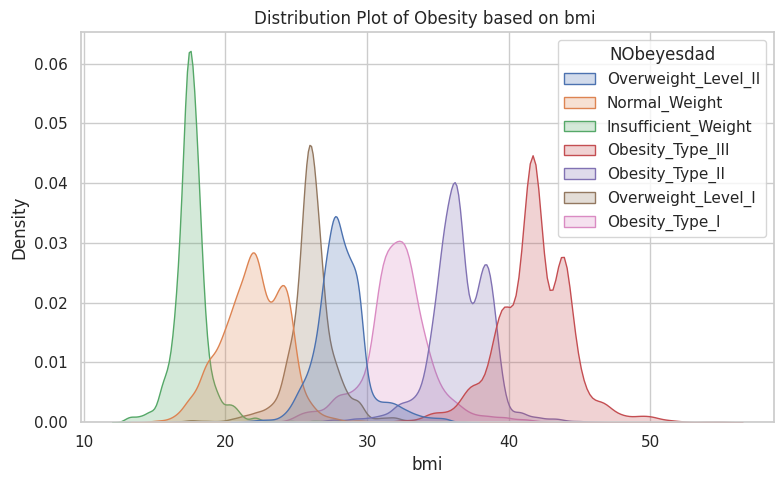

In [24]:
# Plot body mass index
pie_plot(df_train, 'bmi', 'NObeyesdad')

## Obesity based on BMI average score

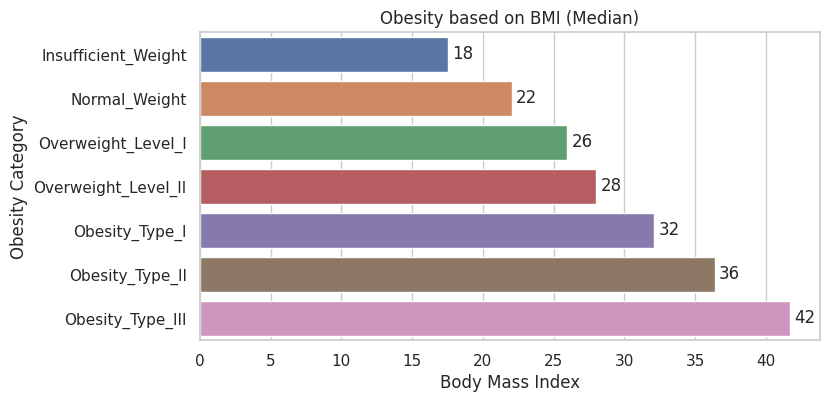

In [25]:
# grouping obesity based on its bmi score
bmi_obese = df_train.groupby('NObeyesdad')['bmi'].median().sort_values(ascending = True)
val = bmi_obese.values
ind = bmi_obese.index

# create barplot
fig = plt.figure(figsize = (8,4))
ax = sns.barplot(x = val, y = ind)
for container in ax.containers:
    ax.bar_label(container, fmt = '%.00f', label_type = 'edge', padding = 3)
plt.title('Obesity based on BMI (Median)')
plt.ylabel('Obesity Category')
plt.xlabel('Body Mass Index')
plt.show()

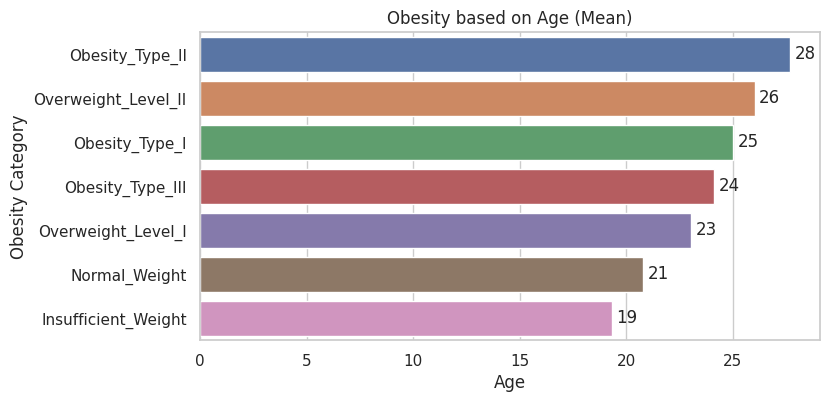

In [26]:
age_obese = df_train.groupby('NObeyesdad')['Age'].mean().sort_values(ascending = False)
val_age = age_obese.values
ind_age = age_obese.index

fig = plt.figure(figsize = (8,4))
ax = sns.barplot(x = val_age, y = ind_age)
for container in ax.containers:
    ax.bar_label(container, fmt = '%.00f', label_type = 'edge', padding = 3)
plt.title('Obesity based on Age (Mean)')
plt.ylabel('Obesity Category')
plt.xlabel('Age')
plt.show()

## Transportation Type based on Obesity Category

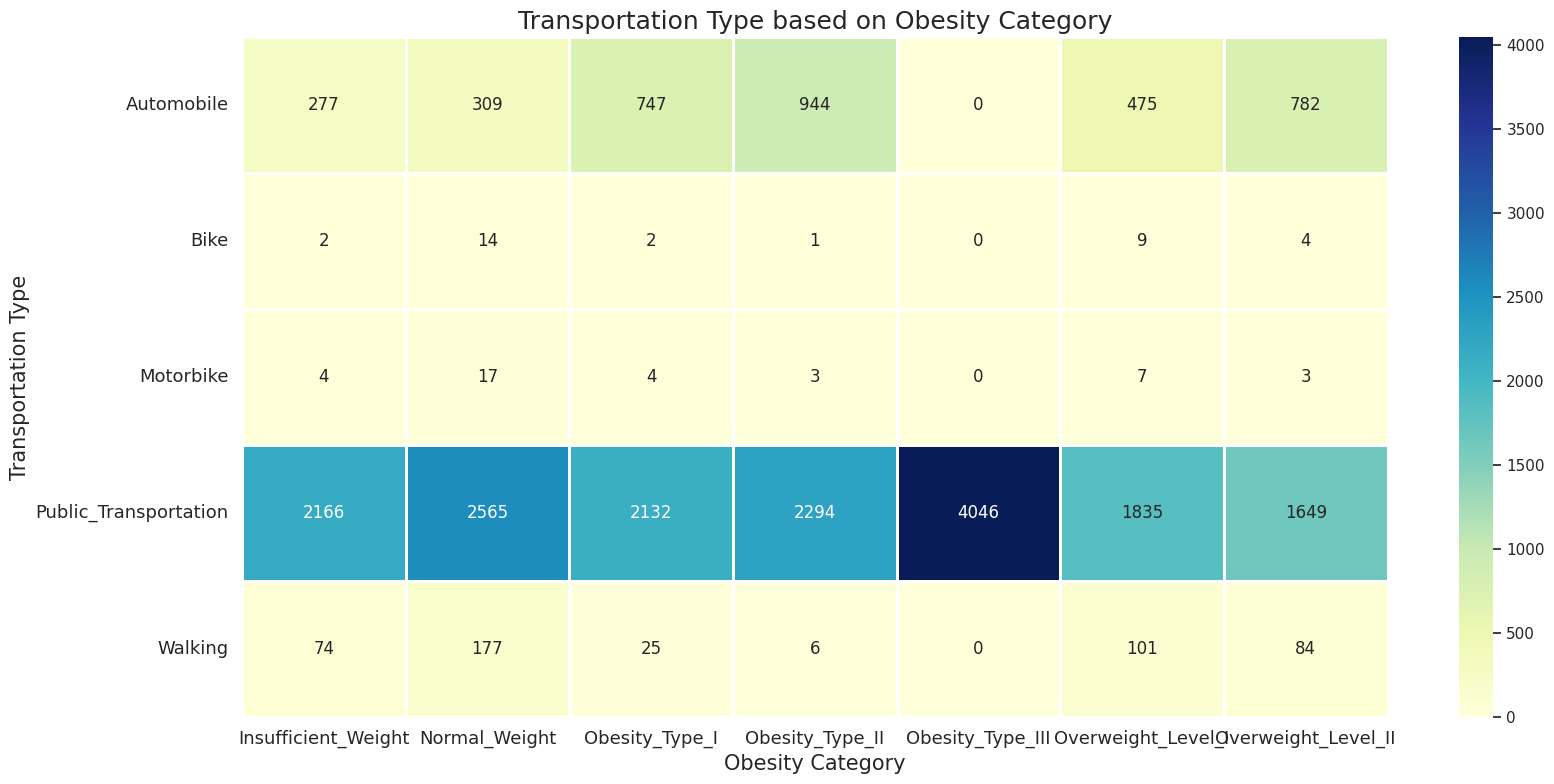

In [27]:
trans_data = df_train.groupby(['MTRANS', 'NObeyesdad'])['NObeyesdad'].count().unstack().fillna(0)
fig = plt.figure(figsize = (17,8))
sns.heatmap(data = trans_data, annot = True, cmap = 'YlGnBu', linewidth = 0.8, fmt = 'g')

#Customize title and label
plt.title('Transportation Type based on Obesity Category', fontsize = 18)
plt.xlabel("Obesity Category", fontsize = 15)
plt.ylabel('Transportation Type', fontsize = 15)
plt.xticks(rotation = 0, fontsize = 13)
plt.yticks(rotation = 0, fontsize = 13)
fig.tight_layout()
plt.show()

## Average BMI by Gender

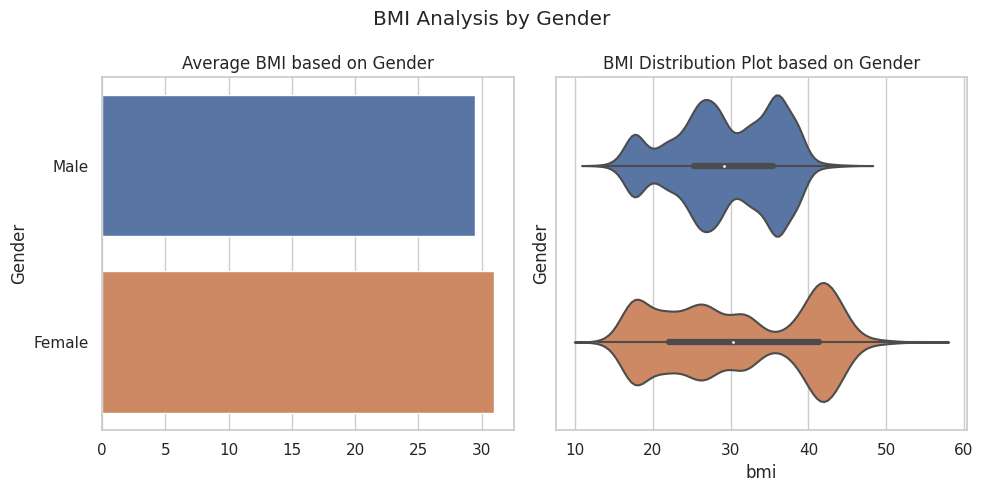

In [28]:
avg_bmi_gender = df_train.groupby('Gender')['bmi'].mean().reindex(['Male', 'Female'])
avg_bmi_val = avg_bmi_gender.values
avg_bmi_index = avg_bmi_gender.index

fig, axs = plt.subplots(1,2,figsize = (10,5), sharey=True)
sns.barplot(x = avg_bmi_val, y = avg_bmi_index, ax = axs[0])
axs[0].set_title('Average BMI based on Gender')
sns.violinplot(data = df_train, x = 'bmi', y = 'Gender', ax = axs[1])
axs[1].set_title('BMI Distribution Plot based on Gender')
plt.suptitle('BMI Analysis by Gender')
fig.tight_layout()
plt.show()

## Obesity Classification based on Gender

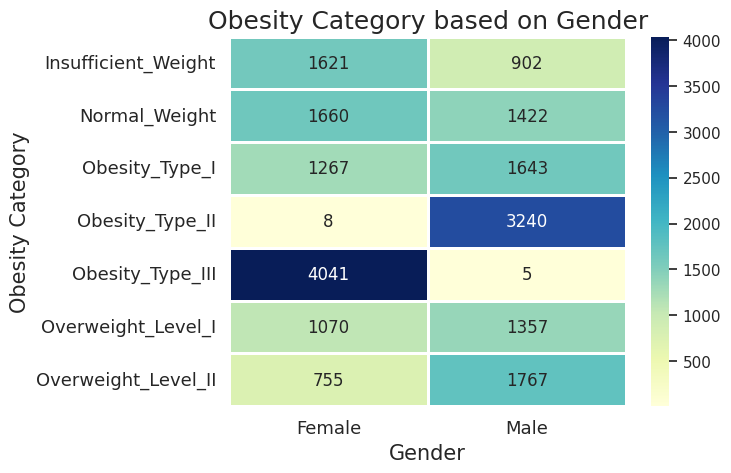

In [29]:
gender_data = df_train.groupby(['NObeyesdad', 'Gender'])['Gender'].count().unstack().fillna(0)

#Customize title and label
sns.heatmap(data = gender_data, annot = True, cmap = 'YlGnBu', linewidth = 0.8, fmt = 'g')
plt.title('Obesity Category based on Gender', fontsize = 18)
plt.xlabel("Gender", fontsize = 15)
plt.ylabel('Obesity Category', fontsize = 15)
plt.xticks(rotation = 0, fontsize = 13)
plt.yticks(rotation = 0, fontsize = 13)
fig.tight_layout()
plt.show()

## Alcohol Consumption based on Obesity Category

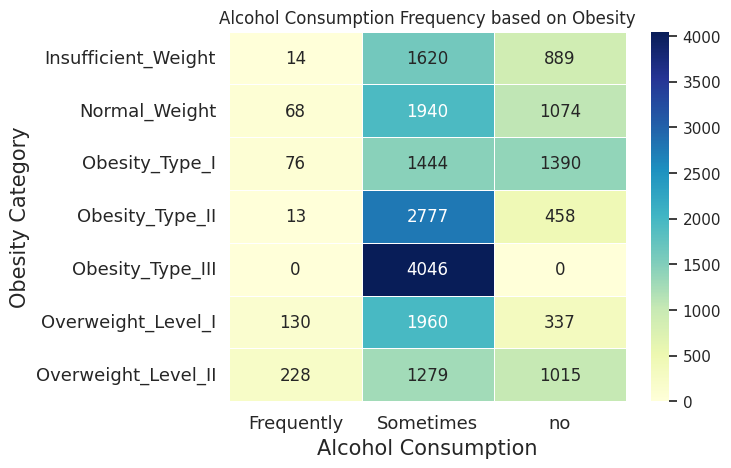

In [30]:
obese_alc = df_train.groupby(['NObeyesdad', 'CALC'])['CALC'].count().unstack().fillna(0)

# create heatmap
sns.heatmap(data = obese_alc, annot = True, cmap = 'YlGnBu', linewidth = 0.5, fmt = 'g')
plt.title('Alcohol Consumption Frequency based on Obesity')
plt.xlabel("Alcohol Consumption", fontsize = 15)
plt.ylabel('Obesity Category', fontsize = 15)
plt.xticks(rotation = 0, fontsize = 13)
plt.yticks(rotation = 0, fontsize = 13)
fig.tight_layout()
plt.show()

# Correlation Obesity Category and Other Object Columns

In [31]:
# Using Contingency Table (Pandas Cross Tab)
gender_obese = pd.crosstab(df_train['Gender'], df_train['NObeyesdad'], normalize = 'index')
gender_obese

NObeyesdad,Insufficient_Weight,Normal_Weight,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III,Overweight_Level_I,Overweight_Level_II
Gender,,,,,,,
Female,0.155536,0.159278,0.121570,0.000768,0.387737,0.102667,0.072443
Male,0.087268,0.137577,0.158959,0.313467,0.000484,0.131289,0.170956


In [32]:
# using Contingency Table + Chi-Squared Test
from scipy.stats import chi2_contingency
import warnings
def crosstab_chi2 (features ,data = df_train, target = 'NObeyesdad'):
    p_val = {}
    for cols in features:
        try:
            cross_tab = pd.crosstab(data[cols], data[target])
            chi2, p, dof, expected = chi2_contingency(cross_tab)
            p_val[cols] = p
        except Exception as e:
            p_val[cols] = f"Error: {e}"
    return pd.Series(p_val, name = 'p_value')

data_objects = df_train.select_dtypes(include = 'object')
crosstab_chi2(data_objects.columns)

Gender                             0.000000e+00
family_history_with_overweight     0.000000e+00
FAVC                               0.000000e+00
CAEC                               0.000000e+00
SMOKE                              6.396982e-44
SCC                               3.870103e-218
CALC                               0.000000e+00
MTRANS                             0.000000e+00
NObeyesdad                         0.000000e+00
Name: p_value, dtype: float64

In [33]:
df_all

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,bmi
id,,,,,,,,,,,,,,,,,
0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,28.259565
1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,23.422091
2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,17.126706
3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,44.855798
4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,25.599151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34593,Male,23.327836,1.721384,78.030383,yes,no,2.813234,3.000000,Sometimes,no,1.000000,no,0.807076,0.778632,Sometimes,Public_Transportation,26.333478
34594,Female,29.000000,1.590000,62.000000,no,yes,3.000000,3.000000,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,24.524346
34595,Female,22.935612,1.585547,44.376637,no,yes,3.000000,2.273740,Frequently,no,2.000000,no,1.949840,1.000000,Sometimes,Public_Transportation,17.652091


# Preprocessing Step

In [34]:
# Object in the train dataset

def encoded_data(data, drop_column = None):
    copy_data = data.copy()
    objects = copy_data.select_dtypes(include = 'object')
    if 'NObeyesdad' in objects.columns:
        copy_data.drop(columns = ['NObeyesdad'], inplace = True)
        objects = copy_data.select_dtypes(include = 'object')
    else:
        objects = copy_data.select_dtypes(include = "object")
    data = pd.get_dummies(data, columns = objects.columns, drop_first = True)
    return data

train_enc = encoded_data(df_train)
test_enc = encoded_data(df_test)
all_enc = encoded_data(df_all)


In [35]:
# Check Missing Data for all dataset
missing_train = set(test_enc.columns) - set(train_enc.columns)
missing_test = set(train_enc.columns) - set(test_enc.columns)
missing_all = set(train_enc.columns) - set(all_enc.columns)

print('Missing in train data: ', missing_train)
print('Missing in test data: ', missing_test)
print('Missing in all data: ', missing_all)

Missing in train data:  {'CALC_Frequently'}
Missing in test data:  {'bmi', 'NObeyesdad'}
Missing in all data:  {'NObeyesdad'}


In [36]:
all_enc.iloc[:len(train_enc)]

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,bmi,Gender_Male,...,CAEC_no,SMOKE_yes,SCC_yes,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
id,,,,,,,,,,,,,,,,,,,,,
0,24.443011,1.699998,81.669950,2.000000,2.983297,2.763573,0.000000,0.976473,28.259565,True,...,False,False,False,False,True,False,False,False,True,False
1,18.000000,1.560000,57.000000,2.000000,3.000000,2.000000,1.000000,1.000000,23.422091,False,...,False,False,False,False,False,True,False,False,False,False
2,18.000000,1.711460,50.165754,1.880534,1.411685,1.910378,0.866045,1.673584,17.126706,False,...,False,False,False,False,False,True,False,False,True,False
3,20.952737,1.710730,131.274851,3.000000,3.000000,1.674061,1.467863,0.780199,44.855798,False,...,False,False,False,False,True,False,False,False,True,False
4,31.641081,1.914186,93.798055,2.679664,1.971472,1.979848,1.967973,0.931721,25.599151,True,...,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,25.137087,1.766626,114.187096,2.919584,3.000000,2.151809,1.330519,0.196680,36.587084,True,...,False,False,False,False,True,False,False,False,True,False
20754,18.000000,1.710000,50.000000,3.000000,4.000000,1.000000,2.000000,1.000000,17.099278,True,...,False,False,False,False,True,False,False,False,True,False
20755,20.101026,1.819557,105.580491,2.407817,3.000000,2.000000,1.158040,1.198439,31.889841,True,...,False,False,False,False,False,True,False,False,True,False


# Train Model

In [37]:
# importlogistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

X = all_enc.iloc[:len(train_enc)]
y = train_enc.NObeyesdad

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.2)
params = {"fit_intercept": True,
         "max_iter":200,
         "penalty": 'l2',
         "C": 0.01}
logreg = LogisticRegression(**params)

logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print(classification_report(y_pred, y_test))

                     precision    recall  f1-score   support

Insufficient_Weight       0.85      0.82      0.83       544
      Normal_Weight       0.69      0.66      0.67       649
     Obesity_Type_I       0.56      0.60      0.58       509
    Obesity_Type_II       0.92      0.79      0.85       761
   Obesity_Type_III       0.99      0.90      0.94       882
 Overweight_Level_I       0.47      0.53      0.50       427
Overweight_Level_II       0.44      0.59      0.50       380

           accuracy                           0.73      4152
          macro avg       0.70      0.70      0.70      4152
       weighted avg       0.75      0.73      0.74      4152



In [38]:
pred_data = all_enc.iloc[len(train_enc):]
pred = logreg.predict(pred_data)
sample_submission = pd.read_csv('/kaggle/input/playground-series-s4e2/sample_submission.csv')
test = pd.read_csv('/kaggle/input/playground-series-s4e2/test.csv')
submission = pd.DataFrame({'id':test.id, 'NObeyesdad':pred})
submission.to_csv('/kaggle/working/submission.csv', index = False)
